In [28]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [29]:
pivot_index = list(df_raw.columns[0:18]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index.remove('retrain')
pivot_index.remove('G_ratio')
pivot_index

['model',
 'dataset',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'inf_time']

In [30]:
df = df_raw.copy()

In [31]:
# df = df[df['G_ratio']==25]
df = df[df['model']=='Resnet18']
df = df[df['GDC'] == 'on']
df = df[df['IOparameter'] == 'ideal']
df = df[df['pgm_noise_scale'] == 1]
df = df[df['retrain'] == 'X']
df = df[df['Gmin']==0.1905]
df = df[df['drift_model'] == 'log']
# df = df[(df['drift_model'] == 0.01)  | (df['drift_model'] == 'log')]

In [20]:
df['pruning'].unique()

array([0.3, 0.4, 0.5, 0.6], dtype=object)

In [50]:
df['new_col'] = df['pruning'].astype(str) + '_' + df['Gmin'].astype(str) + '_' + df['drift_model'].astype(str)

In [51]:
df['new_col'].unique()

array(['-_default_log', '-_default_0.01', '0.3_default_log',
       '0.4_default_log', '0.5_default_log', '0.6_default_log',
       '0.7_default_log', '0.3_default_0.01', '0.4_default_0.01',
       '0.5_default_0.01', '0.6_default_0.01', '0.7_default_0.01',
       '-_0_log', '-_1_log', '-_2_log', '-_5_log', '-_7_log', '-_10_log',
       '-_0_0.01', '-_1_0.01', '-_2_0.01', '-_5_0.01', '-_7_0.01',
       '-_10_0.01'], dtype=object)

In [9]:
# df

In [32]:
df_pivot = df.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns 

In [33]:
df_pivot

pruning,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,inf_time,0.3,0.4,0.5,0.6,-
0,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,1,91.230995,90.926003,89.265999,82.041,92.107002
1,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,10,91.311005,90.637001,89.561996,82.464996,91.988998
2,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,100,90.919998,90.435997,89.137001,81.348,91.911011
3,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,1000,90.655014,89.896004,87.827995,80.513992,91.387001
4,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,3600,90.124001,89.305,86.988991,77.248993,90.814995
5,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,10000,89.392014,88.856003,85.587997,76.612,90.564003
6,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,86400,88.638,87.617996,83.112999,72.085007,89.084
7,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,10000000,83.759003,82.535995,74.935005,62.240002,84.889992
8,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,100000000,79.625999,80.112,69.423996,56.498005,81.762001
9,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,1000000000,76.280991,74.509995,63.779999,50.536995,77.666


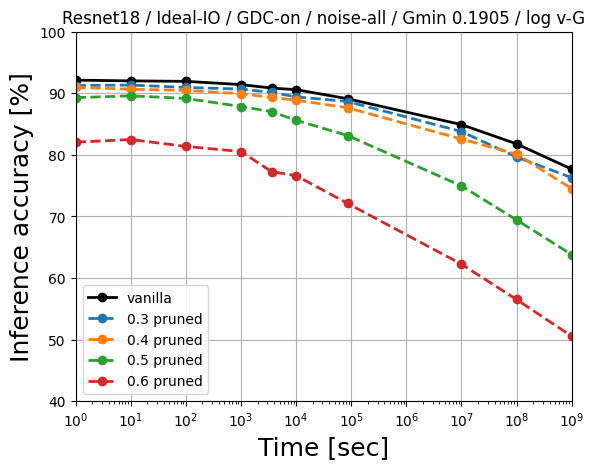

In [36]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot[0.3], marker='o', label = '0.3 pruned', linestyle='--', linewidth=2)
plt.plot(x,df_pivot[0.4], marker='o', label = '0.4 pruned', linestyle='--', linewidth=2)
plt.plot(x,df_pivot[0.5], marker='o', label = '0.5 pruned', linestyle='--', linewidth=2)
plt.plot(x,df_pivot[0.6], marker='o', label = '0.6 pruned', linestyle='--', linewidth=2)


plt.title("Resnet18 / Ideal-IO / GDC-on / noise-all / Gmin 0.1905 / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(40,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

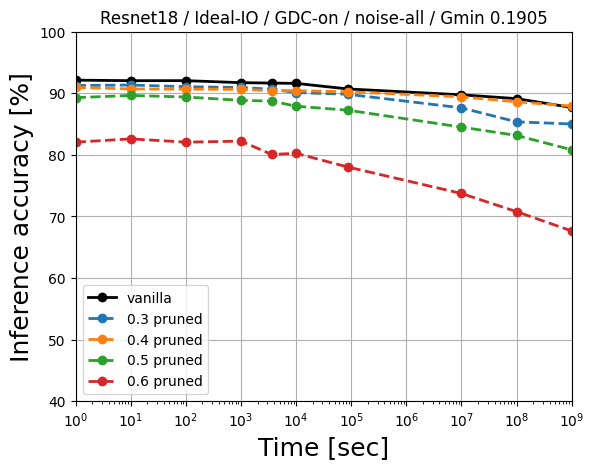

In [ ]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot[0.3], marker='o', label = '0.3 pruned', linestyle='--', linewidth=2)
plt.plot(x,df_pivot[0.4], marker='o', label = '0.4 pruned', linestyle='--', linewidth=2)
plt.plot(x,df_pivot[0.5], marker='o', label = '0.5 pruned', linestyle='--', linewidth=2)
plt.plot(x,df_pivot[0.6], marker='o', label = '0.6 pruned', linestyle='--', linewidth=2)


plt.title("Resnet18 / Ideal-IO / GDC-on / noise-all / Gmin 0.1905")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(40,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()